<a href="https://colab.research.google.com/github/thiagoramos20042/predicao_diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dicionários das features

### Pregnancies == Grávida
### Glucose == Nível de glicose no sangue
### BloodPressure == Pressão arterial
### SkinThickness == Espessura da pele
### Insulin == Insulina
### BMI == índice de massa corporal
###DiabetesPedigreeFunction== Avalia a probabilidade de diabetes com base na familia. 
### Age == Idade
### Outcome == Resultado da nossa variável target



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PI DATA SCIENCE/MÓDULO 4/DATASET/Diabetespred.csv")


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
494,3,80,0,0,0,0.0,0.174,22,0
495,6,166,74,0,0,26.6,0.304,66,0
496,5,110,68,0,0,26.0,0.292,30,0
497,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
# Excluindo os zeros de todas as colunas, menos a do target

novo_df = df[(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]] != 0).all(axis=1)]


In [ ]:
novo_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
486,1,139,62,41,480,40.7,0.536,21,0
490,2,83,65,28,66,36.8,0.629,24,0
493,4,125,70,18,122,28.9,1.144,45,1
497,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 3 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               215 non-null    int64  
 1   Glucose                   215 non-null    int64  
 2   BloodPressure             215 non-null    int64  
 3   SkinThickness             215 non-null    int64  
 4   Insulin                   215 non-null    int64  
 5   BMI                       215 non-null    float64
 6   DiabetesPedigreeFunction  215 non-null    float64
 7   Age                       215 non-null    int64  
 8   Outcome                   215 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 16.8 KB


In [ ]:
novo_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
corr = novo_df.corr()

corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.264071,0.273760,0.173934,0.070043,0.123534,0.017688,0.659119,0.304856
Glucose,0.264071,1.000000,0.198213,0.246318,0.627670,0.192210,0.134904,0.373446,0.486381
BloodPressure,0.273760,0.198213,1.000000,0.133474,0.097910,0.198022,-0.001234,0.305348,0.218269
SkinThickness,0.173934,0.246318,0.133474,1.000000,0.281103,0.669093,0.109664,0.184245,0.299395
Insulin,0.070043,0.627670,0.097910,0.281103,1.000000,0.292205,0.243917,0.251909,0.335563
BMI,0.123534,0.192210,0.198022,0.669093,0.292205,1.000000,0.056411,0.119989,0.288859
DiabetesPedigreeFunction,0.017688,0.134904,-0.001234,0.109664,0.243917,0.056411,1.000000,0.061528,0.162891
Age,0.659119,0.373446,0.305348,0.184245,0.251909,0.119989,0.061528,1.000000,0.378664
Outcome,0.304856,0.486381,0.218269,0.299395,0.335563,0.288859,0.162891,0.378664,1.000000


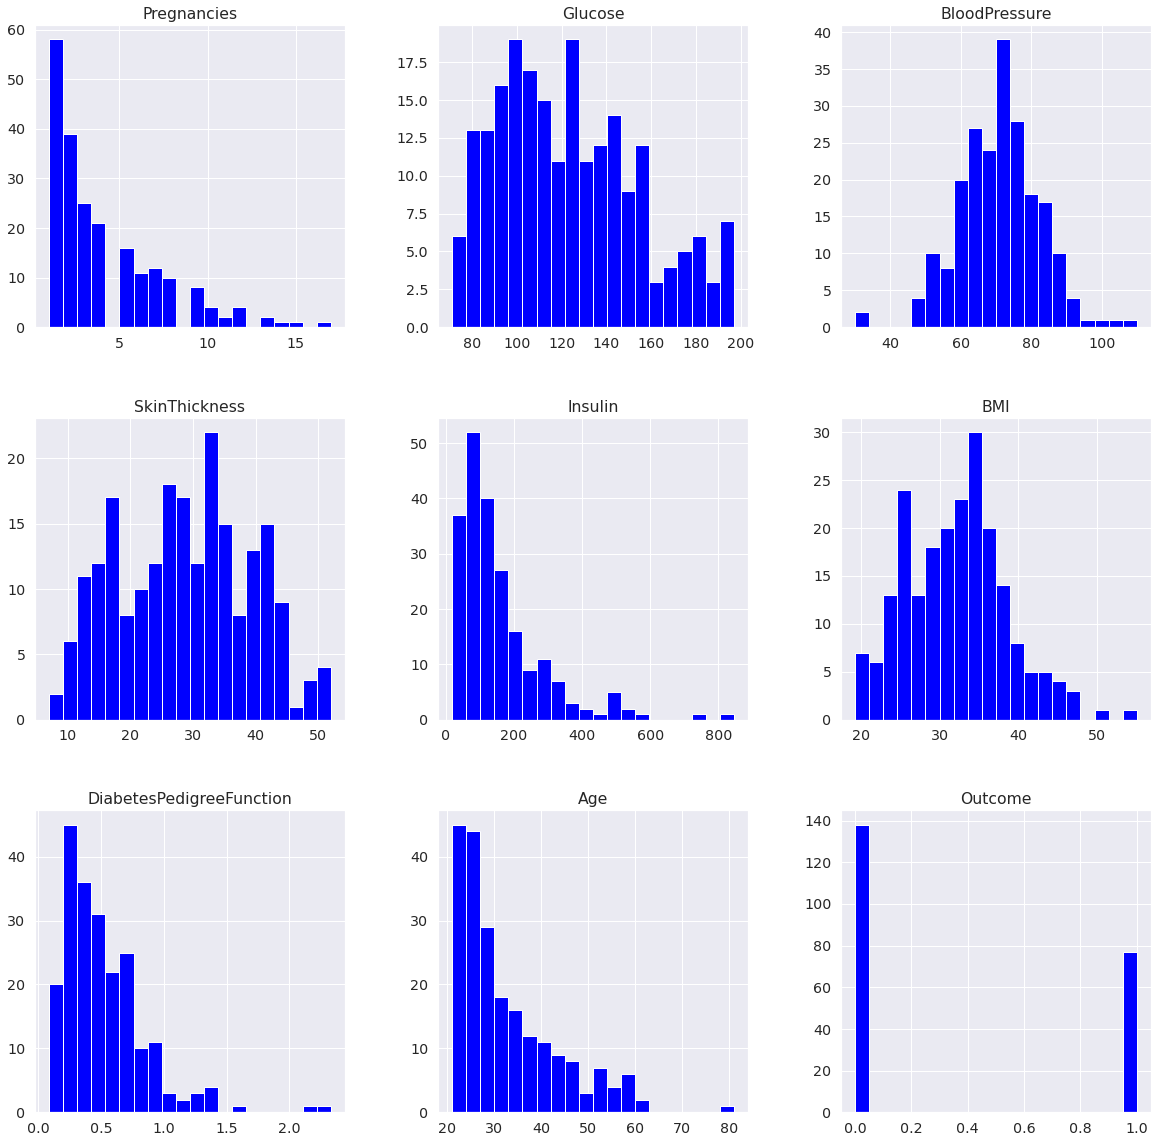

In [ ]:
# Criando um gráfico com as variávis numéricas

sns.set(font_scale=1.3,rc={'figure.figsize':(20,20)})
eixo = novo_df.hist(bins=20,color='blue')

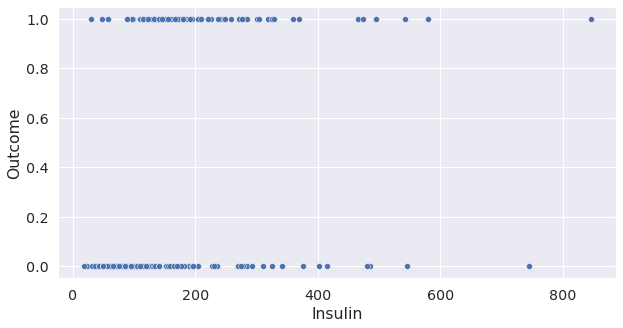

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=novo_df,x='Insulin',y='Outcome');

In [ ]:
# incluindo apenas as features númericas
novo_df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 3 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               215 non-null    int64  
 1   Glucose                   215 non-null    int64  
 2   BloodPressure             215 non-null    int64  
 3   SkinThickness             215 non-null    int64  
 4   Insulin                   215 non-null    int64  
 5   BMI                       215 non-null    float64
 6   DiabetesPedigreeFunction  215 non-null    float64
 7   Age                       215 non-null    int64  
 8   Outcome                   215 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 16.8 KB


In [ ]:
novo_df = novo_df.select_dtypes(include=[np.number])
novo_df = novo_df.dropna(axis="columns", how="any")

X = novo_df.drop(columns=["Outcome"])
y = novo_df["Outcome"]


In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
14,5,166,72,19,175,25.8,0.587,51
...,...,...,...,...,...,...,...,...
486,1,139,62,41,480,40.7,0.536,21
490,2,83,65,28,66,36.8,0.629,24
493,4,125,70,18,122,28.9,1.144,45
497,2,81,72,15,76,30.1,0.547,25


In [ ]:
y

3      0
6      1
8      1
13     1
14     1
      ..
486    0
490    0
493    1
497    0
498    1
Name: Outcome, Length: 215, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(
    X,
    y, test_size=0.20
)

In [ ]:
from sklearn.linear_model import LogisticRegression

Funcao_logistica = LogisticRegression()

Funcao_logistica.fit(x_treino,y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Avaliando o modelo
previsoes = Funcao_logistica.predict(x_teste)

In [ ]:
previsoes

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
# comparando os modelo
y_teste

217    0
454    0
313    0
469    0
476    1
396    0
165    1
51     0
161    0
374    0
203    0
125    1
198    1
31     1
298    1
282    0
134    0
259    1
312    1
241    0
392    0
338    1
195    1
69     0
301    1
432    0
368    0
186    1
234    0
173    0
174    0
393    0
20     0
13     1
191    0
14     1
91     0
244    0
287    1
43     1
441    0
214    1
6      1
Name: Outcome, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_teste,previsoes)

array([[23,  2],
       [ 9,  9]])

#O que são matrizes de confusão?
É um tabela que mostra as frequências de classificação para cada classe do modelo. Pegando o exemplo acima, ela vai nos mostrar as frequências:
###**Verdadeiro positivo**(true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando a mulher está grávida e o modelo previu corretamente que ela está grávida.
###**Falso positivo** (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: a mulher não está grávida, mas o modelo disse que ela está.
###**Falso verdadeiro** (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: a mulher não estava grávida, e o modelo previu corretamente que ela não está.
###**Falso negativo** (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. Por exemplo, quando a mulher está grávida e o modelo previu incorretamente que ela não está grávida.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,previsoes))


              precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       0.82      0.50      0.62        18

    accuracy                           0.74        43
   macro avg       0.77      0.71      0.71        43
weighted avg       0.76      0.74      0.73        43



# interpretando os resultados
#**Recall**
Qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever, no nosso contexto, se a mulher está grávida. É definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

#**Precisão**
eles definem precisão como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? Em outras palavras, o qual bem meu modelo trabalhou.

#**f-score** 
Nos mostra o balanço entre a precisão e o recall de nosso modelo.



In [ ]:
# Novo dado!!!

Pregnancies = 1
Glucose = 200
BloodPressure = 80
SkinThickness = 30
Insulin = 98
BMI = 28.1
DiabetesPedigreeFunction = 0.230
Age = 40




In [ ]:
parametro = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age]]

fazendo_previsoes = Funcao_logistica.predict(parametro)

probabilidade = Funcao_logistica.predict_proba(parametro)


if fazendo_previsoes==0:
  print('Não possui Diabetes')
  print(probabilidade)
else: 
  print('Possui Diabetes')
  print(probabilidade)

Possui Diabetes
[[0.14674543 0.85325457]]
